In [102]:
import pandas as pd 
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

# ExploratoryDataAnalysis

In [103]:
df1 = pd.read_csv('./datasets/PlaneAccidents.csv')
df2 = pd.read_csv('./datasets/Top100Fatalities.csv')

####    PlaneAccidents.csv

In [104]:
#get the data type correctly so we can get the year,month,day out later more easily
df1['date'] = pd.to_datetime(df1['date'],format='%Y-%m-%d')
df1['declared_hour'] = pd.to_datetime(df1['declared_hour'],format='%H:%M')

In [105]:
#let's get the chance to die in each accident while being onboard
df1["deaths_tot"] = 100 * df1.deceased_aboard_total  / df1.aboard_total 
df1["deaths_crew"] = 100 * df1.deceased_aboard_crew  / df1.aboard_crew 
df1["deaths_pass"] = 100 * df1.deceased_aboard_pass  / df1.aboard_pass
df1.iloc[:4,8:]

,aboard_total,aboard_pass,aboard_crew,deceased_aboard_total,deceased_aboard_pass,deceased_aboard_crew,deceased_not_on_total,summary,deaths_tot,deaths_crew,deaths_pass
0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",50.0,0.0,100.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,100.0,0.0,NaN
2,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,100.0,100.0,NaN
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,100.0,100.0,NaN


<AxesSubplot: >

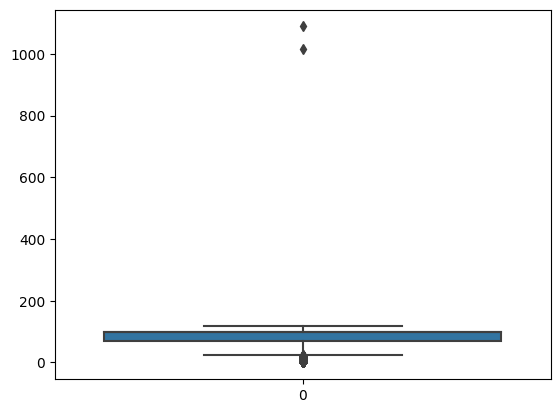

In [106]:
# here we can see clear outliers, so let's rule them out in the next plot as having higher than 100% deaths does not reflect reality
sns.boxplot(data=df1.deaths_pass)

C:\Users\ivand\AppData\Local\Temp\ipykernel_17664\1506850202.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


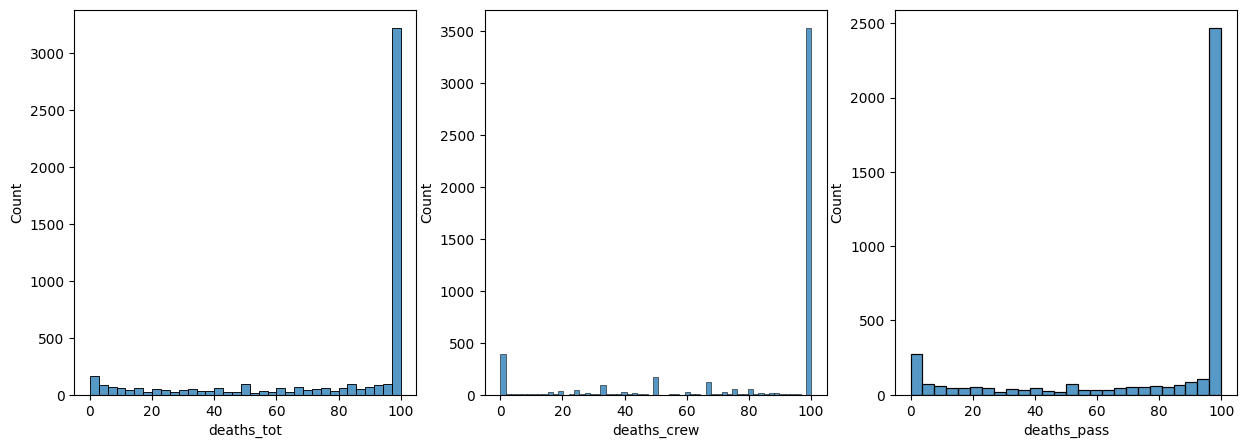

In [107]:
# We can definitely see that surviving a plane crash is really difficult and there is no real discernable difference between being a crew member or a passenger  
fig, ax =plt.subplots(1,3,figsize=(15,5))
sns.histplot(data = df1[df1.deaths_tot <= 100].deaths_tot, ax=ax[0])
sns.histplot(data = df1[df1.deaths_crew <= 100].deaths_crew, ax=ax[1])
sns.histplot(data = df1[df1.deaths_pass <= 100].deaths_pass, ax=ax[2])
fig.show()

<AxesSubplot: xlabel='date', ylabel='Count'>

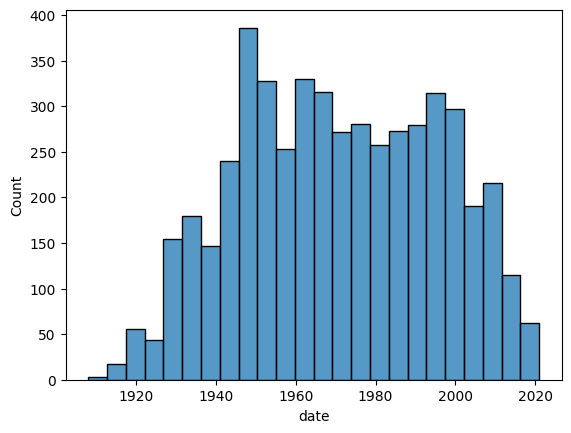

In [108]:
# Now let's see the distribution of accidents by year:  there was a rise from the 1900s as they were JUST invented by the Wright brothers, following by a steady increase caused by the two
#world wars, and then it didn't really die down as airplane traveling became a common commodity so it makes sense that the accidents became steady even though the second world war ended
#an important point to make is that after 2001, there has been a steady decline in airplane accidents. It may largely be because of the added security measures at airports after 9/11.
sns.histplot(data = df1['date'].dt.year)

C:\Users\ivand\AppData\Local\Temp\ipykernel_17664\1288835554.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


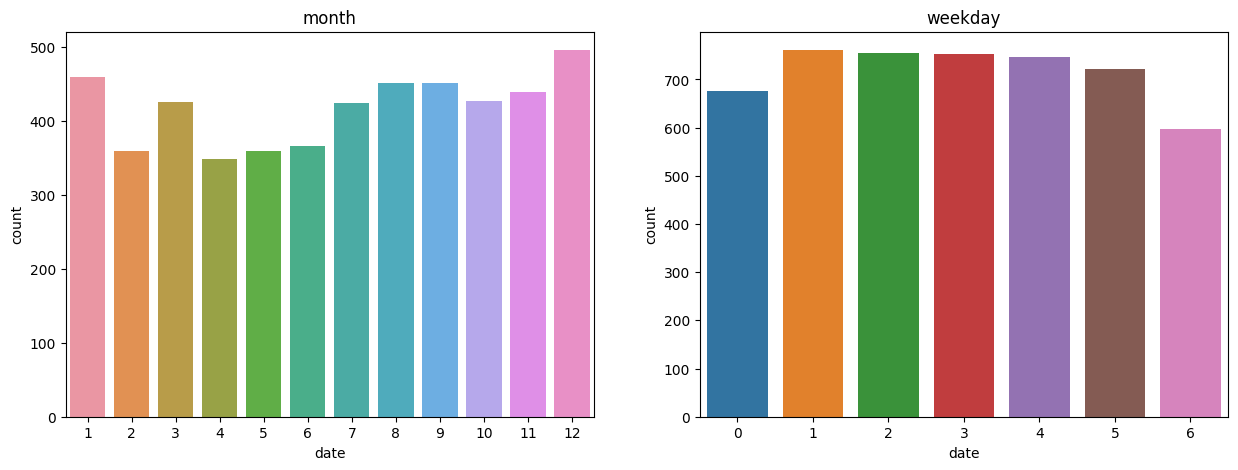

In [109]:
# Here we see December and January are the months where the highest amount of accidents happen, could be because of vacations, although that depends on country and culture
# In weekday plot we can see no special distribution, just a little more disasters by the start of the week
fig, ax= plt.subplots(1,2,figsize=(15,5))
sns.countplot(data = df1, x= df1['date'].dt.month, ax=ax[0])# distribution by month
sns.countplot(data = df1, x= df1['date'].dt.weekday, ax=ax[1]) #to see distribution by day of the week
ax[0].set_title('month')
ax[1].set_title('weekday')
fig.show()

<AxesSubplot: xlabel='declared_hour', ylabel='count'>

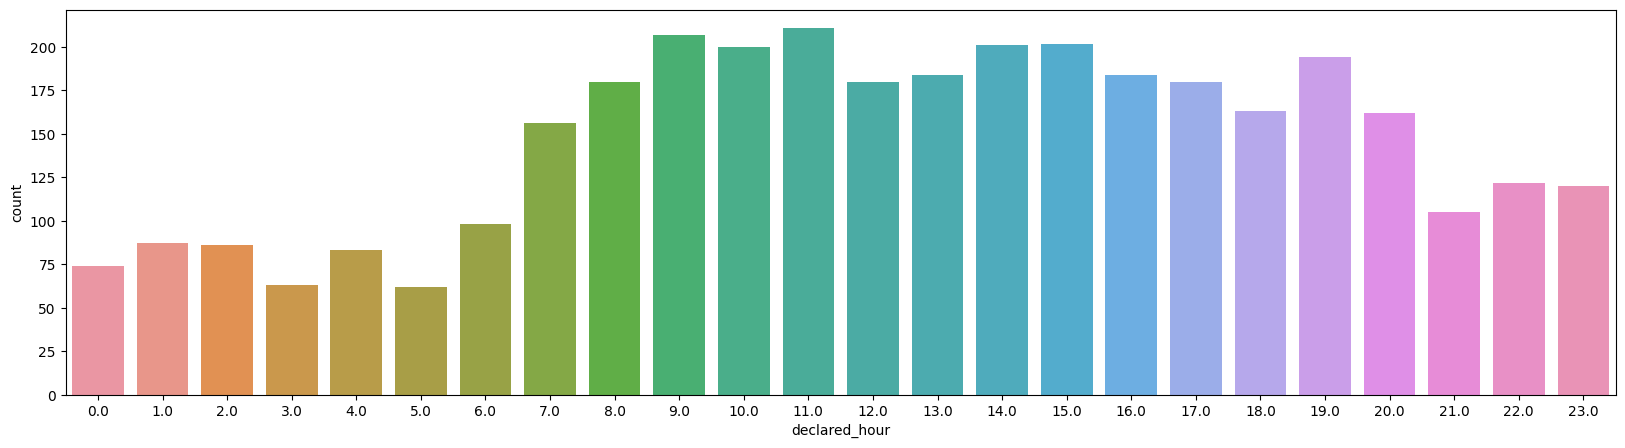

In [110]:
# Accidents seem to happen way more often in the morning and afternoon rather than nights
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data = df1, x= df1['declared_hour'].dt.hour,ax=ax)# distribution by hour

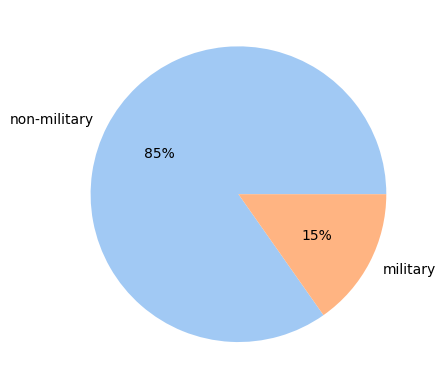

In [111]:
# now finally let's see the distribution with military flights vs passenger flights
df_temp = df1.copy()
df_temp = df_temp.fillna('nothing')
df_temp['operator'] = df_temp['operator'].str.lower()
df_temp['military'] = df_temp.operator.str.contains('military')
df_temp2 = df_temp[df_temp.operator != 'nothing'] # let's drop these null rows as they skew the data since we don't really know what they are
# make a boolean column and see how it's distributed, we'll compare military accidents vs commercial and private flights
palette_color = sns.color_palette('pastel')
plt.pie(df_temp2.military.value_counts(), labels=['non-military','military'], colors=palette_color, autopct='%.0f%%')
plt.show()
# We can see how most of the accidents are non-military and only 15% are from the military. 
#let's see now how it changed over time, as technology normally reaches combat before it reaches the public.


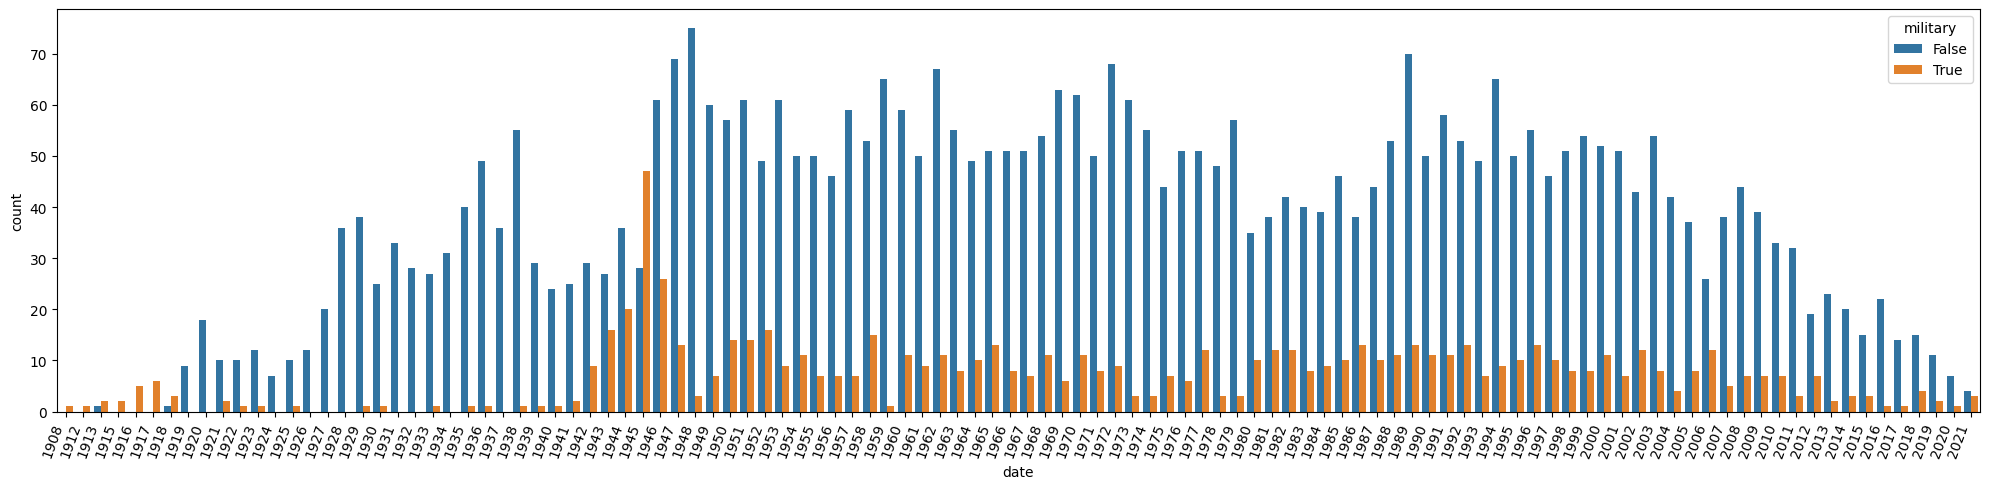

In [112]:
# Here we see the distribution of military and non-military accidents over time, obviously we see a spike happening in each World War but then just a steady amount as they became a common 
#part of warfare.
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data = df_temp2, x= df_temp2.date.dt.year, hue='military')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")
plt.tight_layout()
plt.show()

# Top100Fatalities.csv

Now let's see these same annalysis with the Top100Fatalities.csv

In [113]:
df2.head(5)

,fatalities,date,location,carrier,flight,type
0,2907,2001-09-11,"New York City, New York",American /United Airlines,11/93,B767 / B767
1,583,1977-03-27,"Tenerife, Canary Islands",Pan Am / KLM,1736/4805,B747 / B747
2,520,1985-08-12,"Mt. Osutaka, Japan",Japan Air Lines,123,B747
3,349,1996-11-12,"New Delhi, India",Saudi / Kazastan,763/1907,B747 / Il76
4,346,1974-03-03,"Bois d' Ermenonville, France",Turkish Airlines,981,DC10


In [114]:
# here we have the problem that in this dataset the first row ([0]) is the aggregation of every disaster caused by the 4 planes that Al-Qaeda suicide bombers took control of,
#and in our original dataframe, they are separated, so let's deal with them
df1[df1.date == '2001-09-11']

,date,declared_hour,route,operator,route_type,ac_type,registration,cn_ln,aboard_total,aboard_pass,aboard_crew,deceased_aboard_total,deceased_aboard_pass,deceased_aboard_crew,deceased_not_on_total,summary,deaths_tot,deaths_crew,deaths_pass
4345,2001-09-11,1900-01-01 09:45:00,"Arlington, Virginia.",American Airlines,Washington D.C. - Los Angeles,Boeing B-757-223,N644AA,24602/365,64.0,58.0,6.0,64.0,58.0,6.0,125.0,The aircraft was hijacked after taking off fro...,100.0,100.0,100.0
4346,2001-09-11,1900-01-01 08:47:00,"New York City, New York",American Airlines,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,92.0,81.0,11.0,92.0,81.0,11.0,2750.0,The aircraft was hijacked shortly after it lef...,100.0,100.0,100.0
4347,2001-09-11,1900-01-01 09:03:00,"New York City, New York",United Air Lines,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,65.0,56.0,9.0,65.0,56.0,9.0,2750.0,The aircraft was hijacked shortly after it lef...,100.0,100.0,100.0
4348,2001-09-11,1900-01-01 10:03:00,"Shanksville, Pennsylvania",United Air Lines,Newark - San Francisco,Boeing B-757-222,N591UA,28142/718,44.0,37.0,7.0,44.0,37.0,7.0,0.0,The aircraft was hijacked after taking off fro...,100.0,100.0,100.0


In [115]:
df2.rename({'location': 'route'},axis=1,inplace=True)
df2['date'] = pd.to_datetime(df2['date'],format='%Y-%m-%d')
df_join = df2.merge(df1,how='left',on=['date','route'])
df_join = df_join[['fatalities','date','declared_hour','route', 
'operator','aboard_pass','aboard_crew', 'deceased_aboard_total', 'deceased_aboard_pass', 
'deceased_aboard_crew', 'deceased_not_on_total', 'deaths_tot', 'deaths_crew', 'deaths_pass']]

In [116]:
df_join.drop([0], axis=0, inplace=True)
df_join.head()

,fatalities,date,declared_hour,route,operator,aboard_pass,aboard_crew,deceased_aboard_total,deceased_aboard_pass,deceased_aboard_crew,deceased_not_on_total,deaths_tot,deaths_crew,deaths_pass
1,2907,2001-09-11,1900-01-01 09:03:00,"New York City, New York",United Air Lines,56.0,9.0,65.0,56.0,9.0,2750.0,100.00000,100.000000,100.000000
2,583,1977-03-27,1900-01-01 17:07:00,"Tenerife, Canary Islands",Pan American World Airways / KLM,614.0,30.0,583.0,560.0,23.0,0.0,90.52795,76.666667,91.205212
3,520,1985-08-12,NaT,"Mt. Osutaka, Japan",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,349,1996-11-12,NaT,"New Delhi, India",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,346,1974-03-03,NaT,"Bois d' Ermenonville, France",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df_join.reset_index(inplace=True)
df_join.drop('index',axis=1,inplace=True)
df_join.head()

,fatalities,date,declared_hour,route,operator,aboard_pass,aboard_crew,deceased_aboard_total,deceased_aboard_pass,deceased_aboard_crew,deceased_not_on_total,deaths_tot,deaths_crew,deaths_pass
0,2907,2001-09-11,1900-01-01 09:03:00,"New York City, New York",United Air Lines,56.0,9.0,65.0,56.0,9.0,2750.0,100.00000,100.000000,100.000000
1,583,1977-03-27,1900-01-01 17:07:00,"Tenerife, Canary Islands",Pan American World Airways / KLM,614.0,30.0,583.0,560.0,23.0,0.0,90.52795,76.666667,91.205212
2,520,1985-08-12,NaT,"Mt. Osutaka, Japan",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,349,1996-11-12,NaT,"New Delhi, India",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,346,1974-03-03,NaT,"Bois d' Ermenonville, France",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df_join.head(5)

,fatalities,date,declared_hour,route,operator,aboard_pass,aboard_crew,deceased_aboard_total,deceased_aboard_pass,deceased_aboard_crew,deceased_not_on_total,deaths_tot,deaths_crew,deaths_pass
0,2907,2001-09-11,1900-01-01 09:03:00,"New York City, New York",United Air Lines,56.0,9.0,65.0,56.0,9.0,2750.0,100.00000,100.000000,100.000000
1,583,1977-03-27,1900-01-01 17:07:00,"Tenerife, Canary Islands",Pan American World Airways / KLM,614.0,30.0,583.0,560.0,23.0,0.0,90.52795,76.666667,91.205212
2,520,1985-08-12,NaT,"Mt. Osutaka, Japan",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,349,1996-11-12,NaT,"New Delhi, India",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,346,1974-03-03,NaT,"Bois d' Ermenonville, France",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\ivand\AppData\Local\Temp\ipykernel_17664\1390131893.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


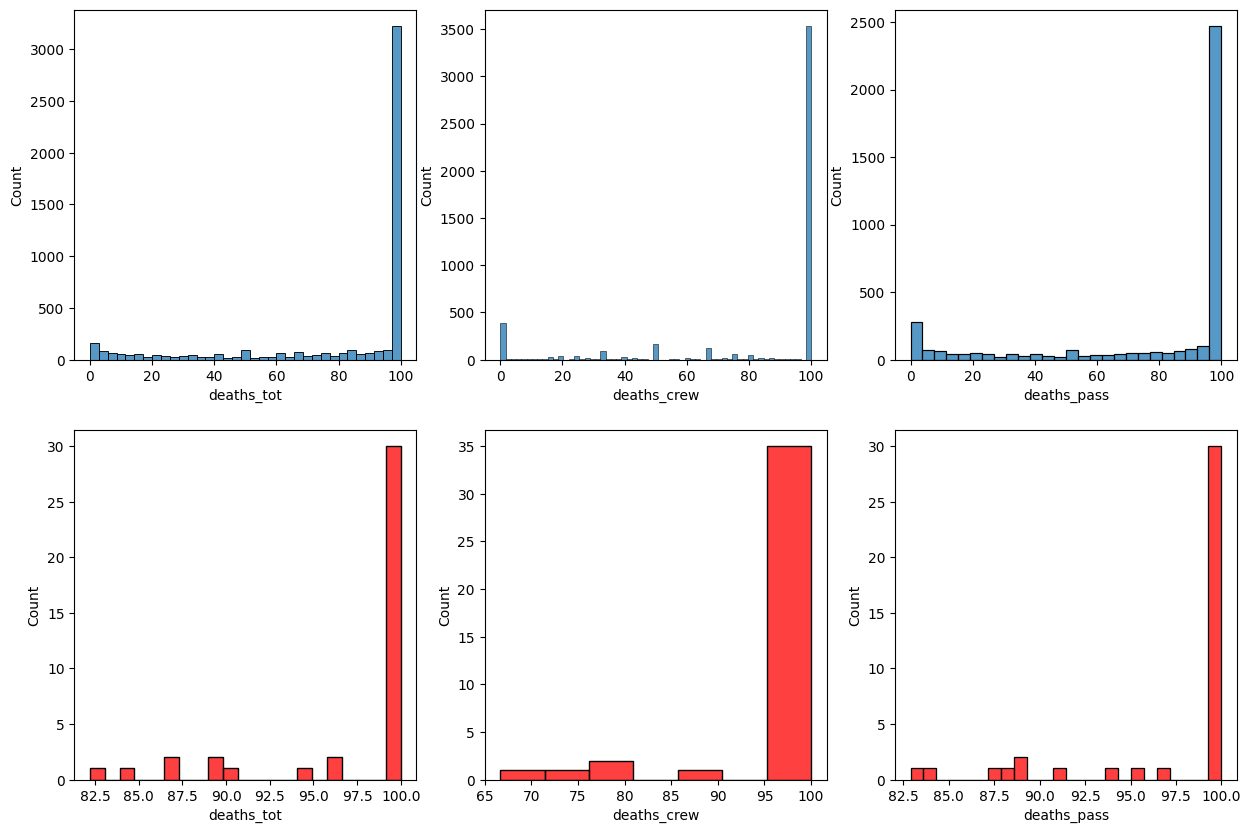

In [119]:
fig, ax =plt.subplots(2,3,figsize=(15,10))
#full dataset plots:
sns.histplot(data = df1[df1.deaths_tot <= 100].deaths_tot, ax=ax[0,0])
sns.histplot(data = df1[df1.deaths_crew <= 100].deaths_crew, ax=ax[0,1])
sns.histplot(data = df1[df1.deaths_pass <= 100].deaths_pass, ax=ax[0,2])
#top100 plots:
sns.histplot(data = df_join[df_join.deaths_pass <= 100].deaths_tot, ax=ax[1,0],color='r')
sns.histplot(data = df_join[df_join.deaths_pass <= 100].deaths_crew, ax=ax[1,1],color='r')
sns.histplot(data = df_join[df_join.deaths_pass <= 100].deaths_pass, ax=ax[1,2],color='r')
fig.show()
#the main takeaway from this plots is that there are way less % or survivors on the more fatal accidents (as it should be)

C:\Users\ivand\AppData\Local\Temp\ipykernel_17664\1620067910.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


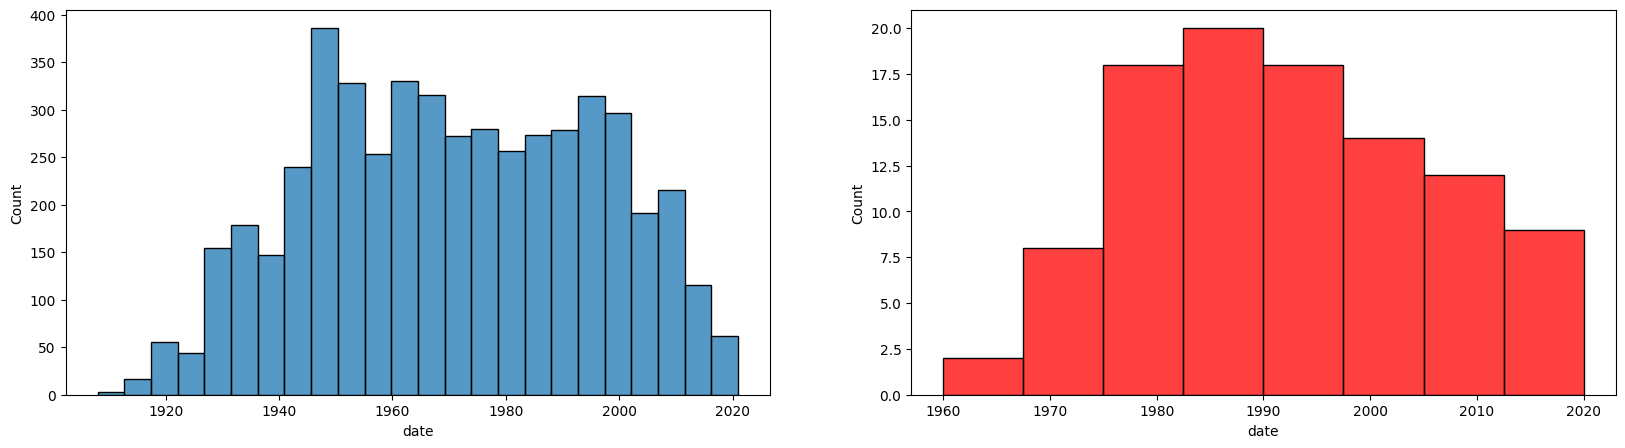

In [120]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.histplot(data = df1['date'].dt.year, ax=ax[0])
sns.histplot(data = df_join['date'].dt.year, ax=ax[1],color='r')
fig.show()
# the main takeaway is when this tragedies took place: you can see in the full dataset there are early dates in the decade of 1900, being the peak the second World War
#but in the top100, it starts in the 1960s, being the highest peak of disasters the 1990s

C:\Users\ivand\AppData\Local\Temp\ipykernel_17664\2781744173.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


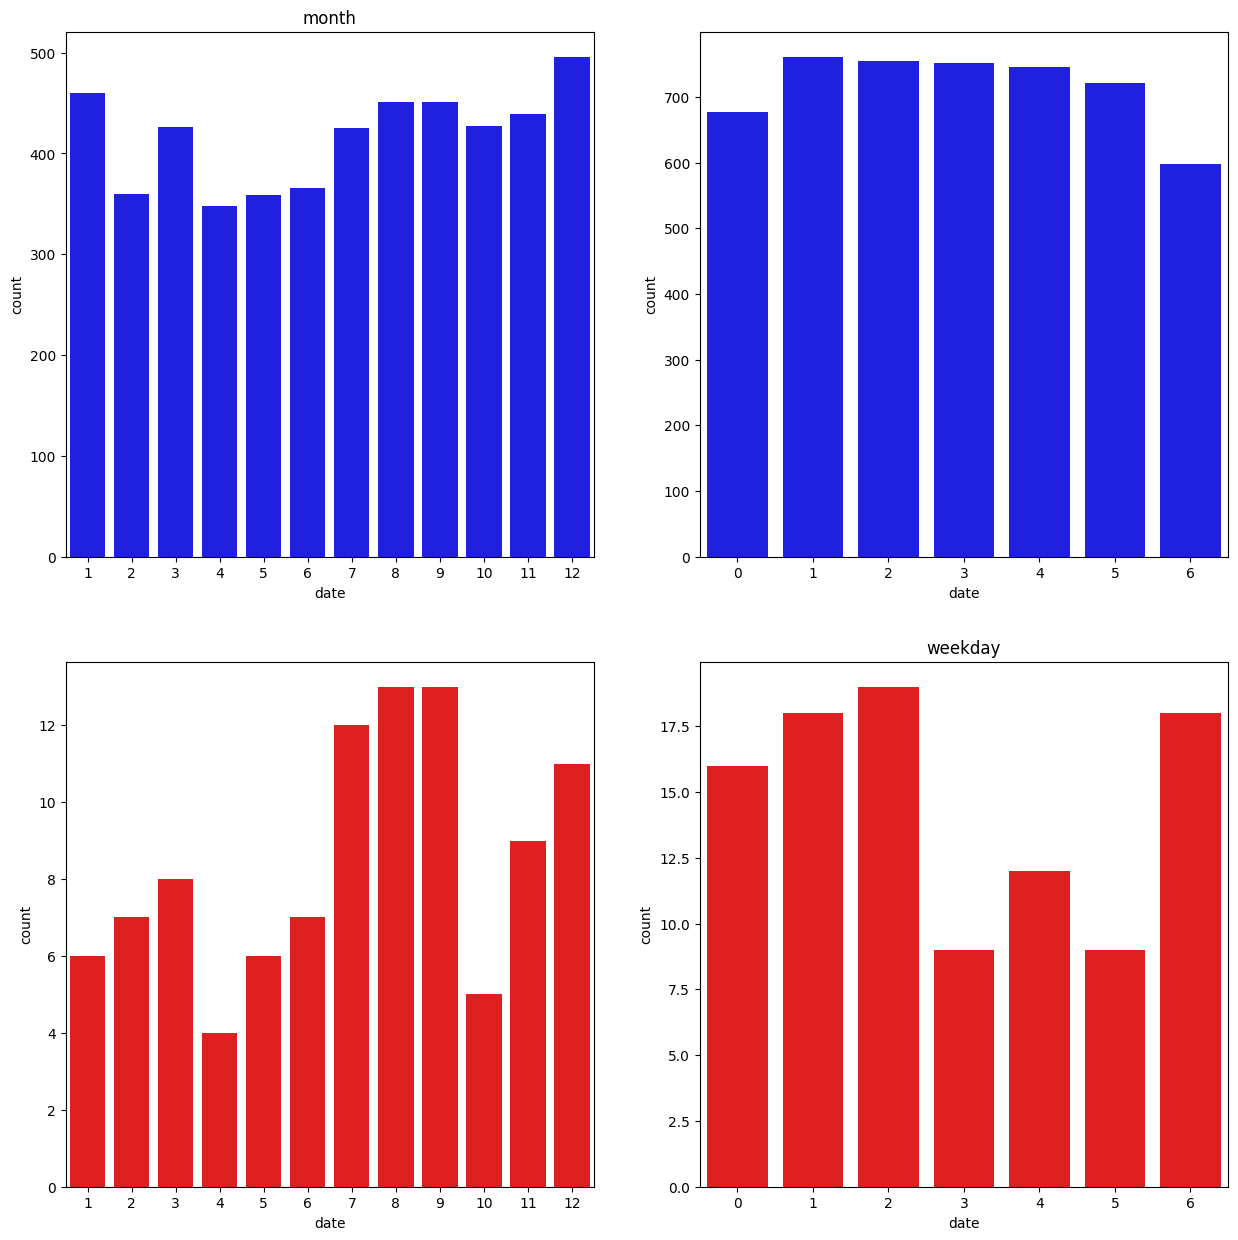

In [121]:
fig, ax= plt.subplots(2,2,figsize=(15,15))
#full dataset:
sns.countplot(data = df1, x= df1['date'].dt.month, ax=ax[0,0],color='b')# distribution by month
sns.countplot(data = df1, x= df1['date'].dt.weekday, ax=ax[0,1],color='b') #to see distribution by day of the week
ax[0,0].set_title('month')
ax[1,1].set_title('weekday')
#top100:
sns.countplot(data = df_join, x= df_join['date'].dt.month, ax=ax[1,0],color='r')# distribution by month
sns.countplot(data = df_join, x= df_join['date'].dt.weekday, ax=ax[1,1],color='r') #to see distribution by day of the week
ax[0,0].set_title('month')
ax[1,1].set_title('weekday')
fig.show()

# Here the main thing is that the distribution may not be as dense as the full dataset, but we can see trends where the in weekday, the more the week goes on, the less disasters happen, 
#until the weekend arrives

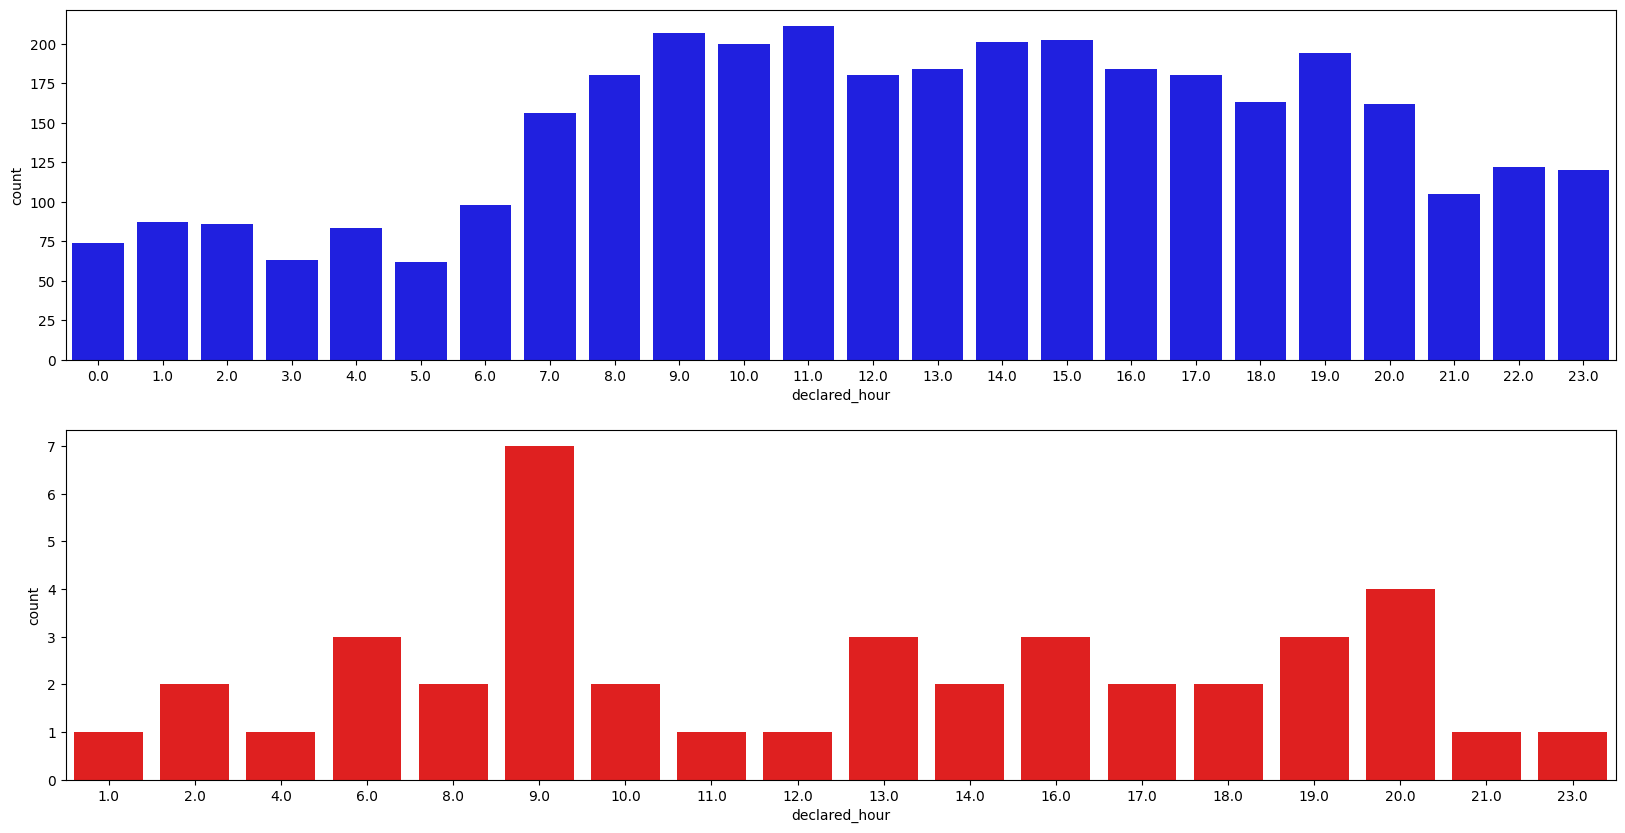

In [122]:
fig, ax = plt.subplots(2,1, figsize=(20, 10))
sns.countplot(data = df1, x= df1['declared_hour'].dt.hour,ax=ax[0],color='b')
sns.countplot(data = df_join, x= df_join['declared_hour'].dt.hour,ax=ax[1],color='r')
plt.show()
#here we see a huge spike happen at 9am, instead of a subtle increment over time

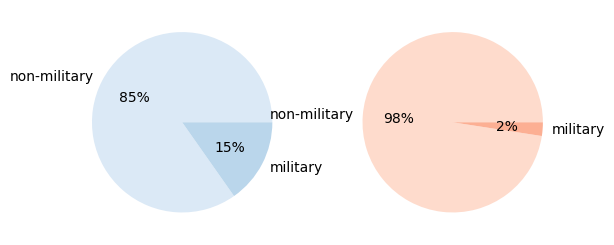

In [123]:
# now finally let's see the distribution with military flights vs passenger flights
df_temp = df1.copy()
df_temp['operator'] = df_temp.operator.fillna('nothing')
df_temp['operator'] = df_temp['operator'].str.lower()
df_temp['military'] = df_temp.operator.str.contains('military')
df_temp = df_temp[df_temp.operator != 'nothing'] # let's drop these null rows as they skew the data since we don't really know what they are

df_temp2 = df_join.copy()
df_temp2['operator'] = df_temp2.operator.fillna('nothing')
df_temp2['operator'] = df_temp2['operator'].str.lower()
df_temp2['military'] = df_temp2.operator.str.contains('military')
df_temp2 = df_temp2[df_temp2.operator != 'nothing']

# make a boolean column and see how it's distributed, we'll compare military accidents vs commercial and private flights
palette_color = sns.color_palette('Blues')
palette_color2 = sns.color_palette('Reds')
fig, ax = plt.subplots(1,2)
ax[0].pie(df_temp.military.value_counts(), labels=['non-military','military'], colors=palette_color, autopct='%1.0f%%')
ax[1].pie(df_temp2.military.value_counts(), labels=['non-military','military'], colors=palette_color2, autopct='%1.0f%%')
plt.show()
# We can see how most of the accidents are non-military and only 2% of them are military incidents

In [124]:
#export these datasets I processed while doing the analysis so I can use them in PowerBi 
df1.to_csv('./datasets/PlaneAccidents.csv',index=False)
df_join.to_csv('./datasets/Top100Fatalities.csv',index=False)
df_temp.to_csv('./datasets/PlaneAccidentsMilitary.csv',index=False)
df_temp2.to_csv('./datasets/Top100FatalitiesMilitary.csv',index=False)

# Conclusions:

Survival rate: in the top100 is much harder to survive than the rest of the accidents(and it makes sense)

Distribution over time: the top100 makes it clear that the planes got bigger passenger capacities and their traffic increased starting from the 60s and starting from 90s airplane security became more and more important so it makes sense that the casualties dropped as well into the 2000s

Distribution by day/month: the top100 show that traveling from tuesday to friday is much safer than traveling in the weekend(saturday to monday)

Distribution by hour: the top100 seem to show a spike at 9am, so it seems to be more dangerous to get into a plane at the start of the day in typical morning routine, and the rest of the dataset shows that 

Military %: way lower % of military tragedies, so it seems that war accident casualties are not really that high compared to commercial airplanes